In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import camb as camb 

In [2]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)
z = np.linspace(0,4,100)

mu = 5.*np.log10(results.luminosity_distance(z))

/tmp/ipykernel_15998/874176731.py:6: RuntimeWarning: divide by zero encountered in log10
  mu = 5.*np.log10(results.luminosity_distance(z))


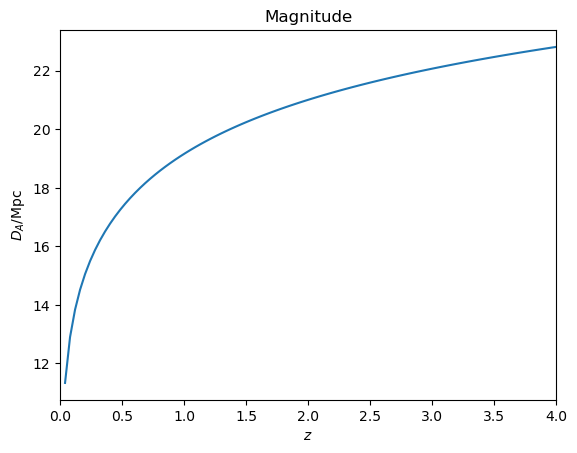

In [3]:
z = np.linspace(0,4,100)
DA = results.luminosity_distance(z)
plt.plot(z, mu)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Magnitude')
#plt.ylim([0,2000])
plt.xlim([0,4]);

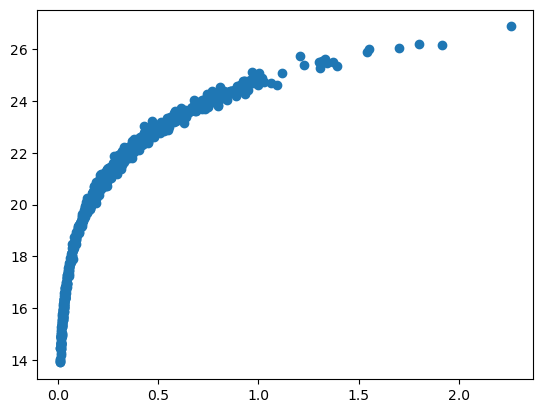

In [4]:
#Dati
data = np.loadtxt("fit_exercise_data.txt")
plt.plot(data[:,0],data[:,1], 'o')
obs_z= data[:,0]
obs_mu=data[:,1]

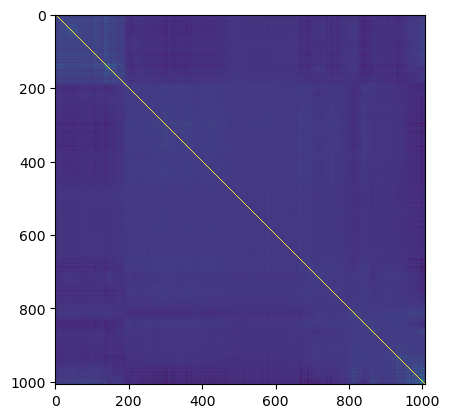

In [5]:
covariance=np.loadtxt("fit_exercise_covariance.txt")
correlation = np.corrcoef(covariance)
plt.imshow(correlation, interpolation = 'nearest')

In [6]:
inv_cov = np.linalg.inv(covariance)

In [ ]:

#Likelihhod gaussiana decade esponenzialmente (perdo precisione velocemente), quindi uso ln(likelihood)
#per le supernovae cambio di luminosità intrinseca che voglio marginalizzare sull'ampieza diventando L_m che rimuove informazione su ampiezza dei dati e su H0

def likelihood(omegam):
    pars = camb.CAMBparams()
    H0=70
    h=H0/100

    pars.set_cosmology(H0=H0, ombh2=omegam*h**2*0.15, omch2=omegam*h**2*0.85)
    results = camb.get_background(pars)
    mu = 5*np.log10(results.luminosity_distance(obs_z))

    residuals=mu-obs_mu
    like=-0.5*np.dot(residuals,np.dot(inv_cov,residuals))+0.5
    ones=np.ones_like(residuals)
    temp_1=np.dot(ones,np.dot(inv_cov, residuals))
    temp_2=np.dot(ones,np.dot(inv_cov, ones))
    like+= 0.5 *temp_1**2/temp_2
    return like

In [8]:
omegam_grid =np.linspace(0.1,0.9,1000)
likelihoods=np.array([likelihood(omegam) for omegam in omegam_grid])
likelihoods=likelihoods-np.max(likelihoods)

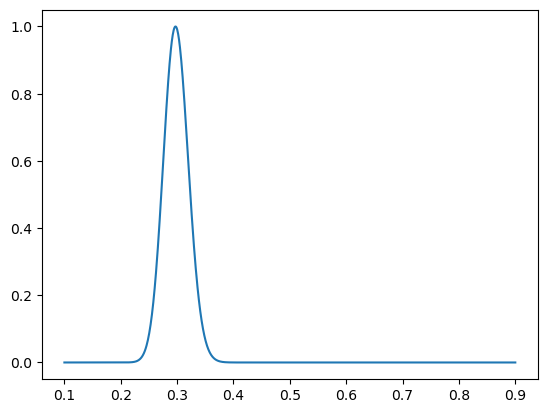

In [9]:
plt.plot(omegam_grid, np.exp(likelihoods))

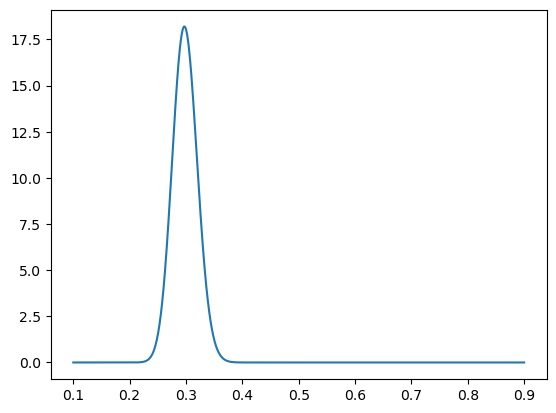

In [10]:
norm = np.trapezoid(np.exp(likelihoods), omegam_grid)
posterior = np.exp(likelihoods)/norm
plt.plot(omegam_grid, posterior)

In [11]:
mean_omegam = np.trapezoid(omegam_grid * posterior, omegam_grid)
variance_omegam = np.trapezoid((omegam_grid - mean_omegam) ** 2 * posterior, omegam_grid)
omegam_error = np.sqrt(variance_omegam)

print(f"Varianza di Ωm: {variance_omegam:.6f}")
print(f"Ωm: {mean_omegam:.4f} +/- {omegam_error:.4f}")
print(f"Deviazione standard di Ωm: {np.sqrt(variance_omegam):.4f}")


Varianza di Ωm: 0.000482
Ωm: 0.2983 +/- 0.0219
Deviazione standard di Ωm: 0.0219


<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_15998/137827724.py:19: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Distribuzione di $\Omega_m$")


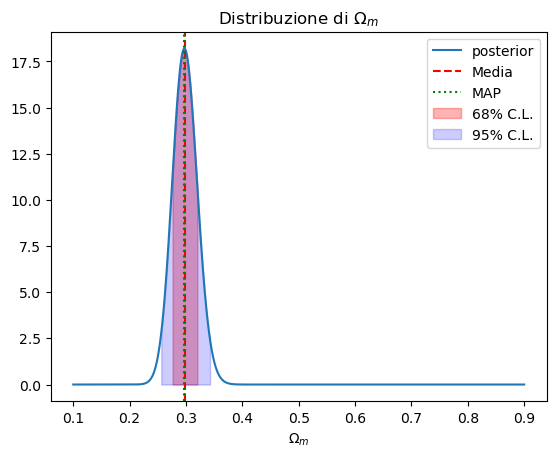

Intervallo di confidenza al 68%: [0.2762, 0.3202]
Intervallo di confidenza al 95%: [0.2562, 0.3426]


In [12]:
#intervalli di confidenza
map_omegam = omegam_grid[np.argmax(posterior)]

cdf = np.cumsum(posterior)
cdf /= cdf[-1]

lower_68 = omegam_grid[np.searchsorted(cdf, 0.16)]
upper_68 = omegam_grid[np.searchsorted(cdf, 0.84)]
lower_95 = omegam_grid[np.searchsorted(cdf, 0.025)]
upper_95 = omegam_grid[np.searchsorted(cdf, 0.975)]

plt.figure()
plt.plot(omegam_grid, posterior, label="posterior")
plt.axvline(mean_omegam, color='r', linestyle='--', label="Media")
plt.axvline(map_omegam, color='g', linestyle=':', label="MAP")
plt.fill_between(omegam_grid, posterior, where=(omegam_grid >= lower_68) & (omegam_grid <= upper_68), color='red', alpha=0.3, label="68% C.L.")
plt.fill_between(omegam_grid, posterior, where=(omegam_grid >= lower_95) & (omegam_grid <= upper_95), color='blue', alpha=0.2, label="95% C.L.")
plt.xlabel(r'$\Omega_m$')
plt.title("Distribuzione di $\Omega_m$")
plt.legend()
plt.show()

print(f"Intervallo di confidenza al 68%: [{lower_68:.4f}, {upper_68:.4f}]")
print(f"Intervallo di confidenza al 95%: [{lower_95:.4f}, {upper_95:.4f}]")

In [13]:
omegam=0.3
pars = camb.CAMBparams()
H0=70
h=H0/100

pars.set_cosmology(H0=H0, ombh2=omegam*h**2*0.15, omch2=omegam*h**2*0.85)
results = camb.get_background(pars)
mu = 5*np.log10(results.luminosity_distance(obs_z))

residuals=mu-obs_mu
like=-0.5*np.dot(residuals,np.dot(inv_cov,residuals))+0.5
ones=np.ones_like(residuals)
temp_1=np.dot(ones,np.dot(inv_cov, residuals))
temp_2=np.dot(ones,np.dot(inv_cov, ones))
like+= 0.5 *temp_1**2/temp_2

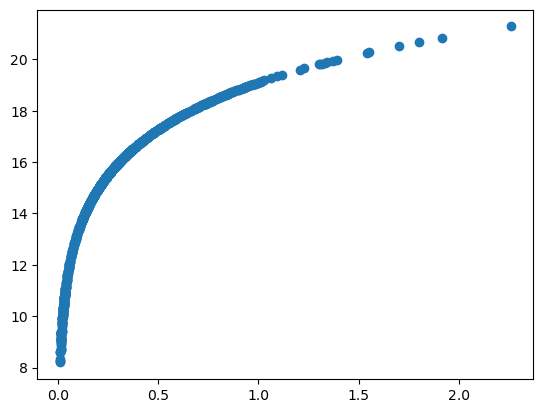

In [14]:
plt.plot(obs_z, mu, 'o')